# Planning an advertising campaign for an online game store

Our customer is an online store that sells computer games all over the world. What games to sell? Which gaming platform is the most relevant right now? At the same time, we do not have our own data. No problem, let's take data from open sources.  
  
Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. We need to identify patterns that determine the success of the game. This will allow us to put our stake on potentially popular product and plan advertising campaigns.  
We have data up to 2016. Let's imagine that it's December 2016, and we are planning a campaign for 2017. We need to work out the principle of working with data. It doesn't matter whether we forecast sales for 2017 according to 2016 data or 2027 according to 2026 data.
The data set contains the abbreviation ESRB (Entertainment Software Rating Board), an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category, for example, "Adults Only 18+", "Everyone" or "Teen". 

Key steps:
* Reviewing data
* Data preprocessing. Calculations and adding the necessary results for analysis
* Data analysis
* Drawing up an information portrait of the user of each region
* Hypothesis testing
* General conclusion

**Jupiter Notebook**, **Python** version 3.7.8.
The project uses the following libraries:
* **Pandas**
* **MatPlotLib**
* **NumPy**
* **Math**
* **SciPy** 
* **IPython**

## Reviewing data

In [1]:
# Import required libraries and modules.
import math as mt
from math import factorial

import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats as st
# Read the file.
data = pd.read_csv('games.csv')
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Conclusion

Here is a dataframe with data on game sales, user and expert ratings, genres and platforms.
The dataframe has 11 columns and 16715 rows.  
The `float64` data type is stored in 6 columns:
* *Year_of_Release (year of release of the game)*
* *NA_sales (sales in North America), million copies*
* *EU_sales (sales in Europe), million copies*
* *JP_sales (sales in Japan), million copies*
* *Other_sales (sales in other countries), million copies*
* *Critic_Score (critics' score), maximum 100*  
  
In 5 columns, the text or mixed data type `object`:
* *Name (name of the game)*
* *Platform (name of the game platform)*
* *Genre (name of the game genre)*
* *User_Score (user rating), max 10*
* *Rating (rating from the ESRB organization)*  
  
**Ideas for data preprocessing and additional data calculations:**  
  
* It is necessary to change the column names by bringing them to lower case. Storing column names with capital letters in this case is definitely inconvenient and impractical.
* Check the entire table for row duplicates, then check the *Name* column separately
* We will examine the table for missing values and decide whether to process them, and if so, how. The missing values are recorded in the columns *Name*, *Year_of_Release*, *Genre*, *Critic_Score*, *User_Score*, *Rating*.
* If we manage to process the missing values, we will convert the data type in the *Year_of_Release* column (it makes no sense to store the date in the `float` format). Let's review the _Critic_Score_ column: perhaps the critics score does not have shares and does not need the float format (we will change the format if we can get rid of the NaN-values). It is necessary to study the `tbd` values in the *User_Score* column and make a decision on their processing. After processing, consider converting the data type of the *User_Score* column from `object` to `float`.
* Apparenty, it is necessary to calculate the total sales of each game in all regions. Let's calculate it and add it to a new column.

## Data preprocessing. Calculations and adding the necessary results for analysis

In [2]:
# Change the column names to lower case.
data.columns = data.columns.str.lower()

In [3]:
# Check the table for row duplicates.
print('Row duplicates number:', data.duplicated().sum())
# Check the name column for duplicates.
data['name'].value_counts()

Row duplicates number: 0


Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

There are rows with the same values in the *name* column, but on closer examination it becomes clear that these rows reflect the same game on different platforms or its re-release. There is no need to process such duplicates.

In [4]:
# Review missing values. Let's start with the name column.
data.loc[data['name'] != data['name']]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are two missing values in the *name* column. These lines could have been left out (*name* is not the most important column to analyze). But the lack of data in the columns *genre*, *critic_score*, *user_score*, *rating* makes these lines uninformative. We decide to remove them.

In [5]:
# Remove missing values in the name column.
data = data.dropna(subset=['name']).reset_index(drop=True)
# Missing values remain only in columns year_of_release,
# critic_score, user_score, rating.
# Consider the year_of_release column.
data.loc[data['year_of_release'] != data['year_of_release']]
# Consider the critic_score column.
data.loc[data['critic_score'] != data['critic_score']]
# Consider the user_score column.
data.loc[data['user_score'] != data['user_score']]
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


It will not work to fill in `NaN`-values correctly, you cannot delete them. But let's replace the tbd-values with `NaN`, so that it is possible to perform mathematical operations with the column. `tbd` is to be determined/decided. The meaning of `tbd` is in this case the same as `NaN`.

In [6]:
# Cast the user_score column to a real number type,
# along the way, replacing tbd-values with NaN.
data['user_score'] = pd.to_numeric(
    data['user_score'], 
    errors='coerce'
)
# Calculate the total sales of each game.
data['sales_total'] = (
    data['na_sales'] + 
    data['eu_sales'] + 
    data['jp_sales'] + 
    data['other_sales']
)
# Calculate the total sales in all regions.
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_sales = []
for region in regions:
    region_sales.append(data[region].sum())
total_sales_by_region = pd.Series(region_sales, index=regions)
display(total_sales_by_region)

na_sales       4400.57
eu_sales       2424.14
jp_sales       1297.34
other_sales     791.24
dtype: float64

In [7]:
# Delete the line 15955. It indicates the year the game was released 
# in 1985 on the DS platform.
# Impossible: The Nintendo DS came out in 2004.
display(data.query('platform == "DS" and year_of_release == 1985'))
data = data.drop(15955).reset_index(drop=True)
# Change the format of the year_of_release column from float64 to Int64.
data['year_of_release'] = data['year_of_release'].astype('Int64')
display(data)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
15955,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16709,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  sales_total      16712 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


### Conclusion

We have preprocessed the data and added the necessary data to the dataframe.
1. **Column names**  
Table column names contained lowercase letters. There is no point in writing the column names in lowercase letters. This format for writing column names is inconvenient and may cause errors in writing code in the future. We've converted all column names to lowercase.
2. **Duplicates**  
We checked the table for row duplicates. There are no row duplicates in the table.  
We also separately checked the *name* column for duplicates. There are lines with the same values in the *name* column, but on closer examination it becomes clear that these lines reflect the same game on different platforms, or its re-release. There is no need to process such duplicates, because despite the same name of the game, each such line carries unique information, a unique release of the game.
3. **Missing values**
* We reviewed missing values in the table. There are two `NaN`-values in the *name* column. We are talking about two games platform GEN (Sega Genesis). The reason why the names of the games were lost is unknown. Apparently, they could not be processed, since the *name* column is obviously not so important for further analysis. Let's say it would be quite possible to imagine that `NaN` is the name of the game and analyze these lines. However, these rows differ from others in that most of their columns also have `NaN`-values, and these columns are critical for further analysis (we are talking about *critic_score*, *user_score*, *rating* columns). The reason why there are no values in these columns is probably the lack of maintenance of any rating system for computer games by critics and users. Or low popularity of the game/circulation of the game. And the ESRB was founded on September 16, 1994, which explains the lack of an ESRB rating for these games. Given these facts, as well as not the highest sales figures in all regions, we decided to get rid of these two lines.
* We checked missing values in the *year_of_release* column. There are only 269 such rows. Probably, these missing values appeared due to the absence of this information from the author-compiler of the table. The original idea was to write a function that determines the presence of a year (in numerical form) in the game name and transfers it to the *year_of_release* column. This idea had to be dropped, as it is not uncommon for the year listed in the game's title to not be the year the game was released. For example, the game Madden NFL 2004 was released in 2003 (this is generally typical for sports simulations). And the game The Order 1888, for obvious reasons, was not released in 1888. It is impossible to replace these missing values automatically (only if manually, armed with a search engine, and it is not practical to delete them (these lines are rich in data necessary for analysis).
* After removing the two `NaN`-values in the *name* column, there are no more gaps in the *genre* column.
* We will not process `NaN`-values in the *critic_score*, *user_score* and *rating* columns. As mentioned above, most likely, these columns are missing values due to the lack of any rating system for computer games by critics and users. Or low popularity of the game/circulation of the game. And the ESRB was founded on September 16, 1994, which explains the lack of an ESRB rating for many games. Correctly replacing `NaN`-values in these columns will not work, since we have nothing to rely on to select the appropriate value. When talking about critics' and users' ratings, we can't choose a replacement value, since we can't properly rate a game (recent and even older) for critics, for users, for the ESRB. Evaluation itself is subjective. Also, a small number of sales does not mean that the game is bad and should have a low rating, just as a large number of sales does not mean that the game is great.
* There are `object` values in the *user_score* column `tbd`. Because of them, the entire column is in the `object` format, which means that we cannot perform mathematical operations on this column. `Tbd` means to be decided or to be determined. In this case, `tbd` are equivalent to `NaN`, so we decided to replace them with `NaN` in order to bring the column to the `float` format.
4. **Change data format**
* We changed the *year_of_release* column format from float64 to `Int64`. Game release years are now displayed without floating point.
* After replacing `tbd` with `NaN`, the *user_score* column format still remains `object`. We converted the data type of the column to real using the `pd.to_numeric()` method.
* Despite the fact that in the *critic_score* column all numbers are actually integers, they are in real form, and it will not be possible to convert them to integer format, since there are `NaN` values in the column.
5. **Data errors**  
Line 15955 contains information about the game Strongest Tokyo University Shogi DS. The platform listed is DS (Nintendo DS). Apparently, this is a mistake, since the DS entered the market in 2004. It's a good idea to remove this line.
5. **Calculation of total sales**
* We calculated the total sales of each game. The results are recorded in the *sales_total* column.
* We calculated the total sales in each region and stored them in a separate `Series` object *total_sales_by_region*.

## Data Analysis

,games_number
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16
1988,15


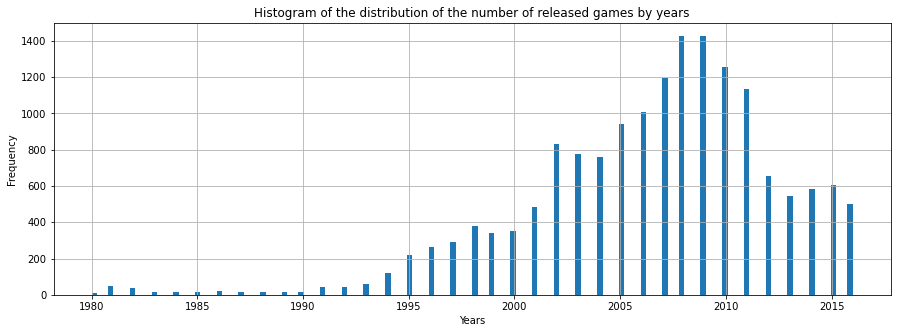

In [8]:
# Let's calculate how many games were released in different years.
games_by_year = data.pivot_table(
    index='year_of_release',
    values='name', 
    aggfunc='count'
)
games_by_year.columns = ['games_number']
display(games_by_year)
data['year_of_release'].plot(kind='hist',
                             bins=140,
                             grid=True,
                             figsize=(15,5))
plt.title('Histogram of the distribution of the number of released games by years')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Let's see how sales changed by platform.
sales_by_platforms = data.pivot_table(
    index='platform',
    values=['na_sales', 
            'eu_sales', 
            'jp_sales', 
            'other_sales',
            'sales_total'], 
    aggfunc='sum'
).sort_values('sales_total', ascending=False)
display(sales_by_platforms)
# Leave the 10 most commercially successful platforms.
top_10_platforms = sales_by_platforms.loc[
    sales_by_platforms['sales_total'] >= 259
].reset_index()
display(top_10_platforms)
# Let's create a Series object with the names of the most 
# commercially successful platforms.
top_10_list = top_10_platforms['platform']
display(top_10_list)

,eu_sales,jp_sales,na_sales,other_sales,sales_total
platform,,,,,
PS2,339.29,139.20,583.84,193.44,1255.77
X360,270.76,12.43,602.47,85.76,971.42
PS3,330.29,80.19,393.49,135.68,939.65
Wii,262.21,69.33,496.90,79.07,907.51
DS,188.89,175.55,382.40,59.26,806.10
PS,213.61,139.82,336.52,40.91,730.86
GBA,75.25,47.33,187.54,7.73,317.85
PS4,141.09,15.96,108.74,48.35,314.14
PSP,66.68,76.78,109.17,41.42,294.05


,platform,eu_sales,jp_sales,na_sales,other_sales,sales_total
0,PS2,339.29,139.20,583.84,193.44,1255.77
1,X360,270.76,12.43,602.47,85.76,971.42
2,PS3,330.29,80.19,393.49,135.68,939.65
3,Wii,262.21,69.33,496.90,79.07,907.51
4,DS,188.89,175.55,382.40,59.26,806.10
5,PS,213.61,139.82,336.52,40.91,730.86
6,GBA,75.25,47.33,187.54,7.73,317.85
7,PS4,141.09,15.96,108.74,48.35,314.14
8,PSP,66.68,76.78,109.17,41.42,294.05
9,PC,142.44,0.17,94.53,22.38,259.52


0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      GBA
7      PS4
8      PSP
9       PC
10     3DS
Name: platform, dtype: object

platform,3DS,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,,
1985,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


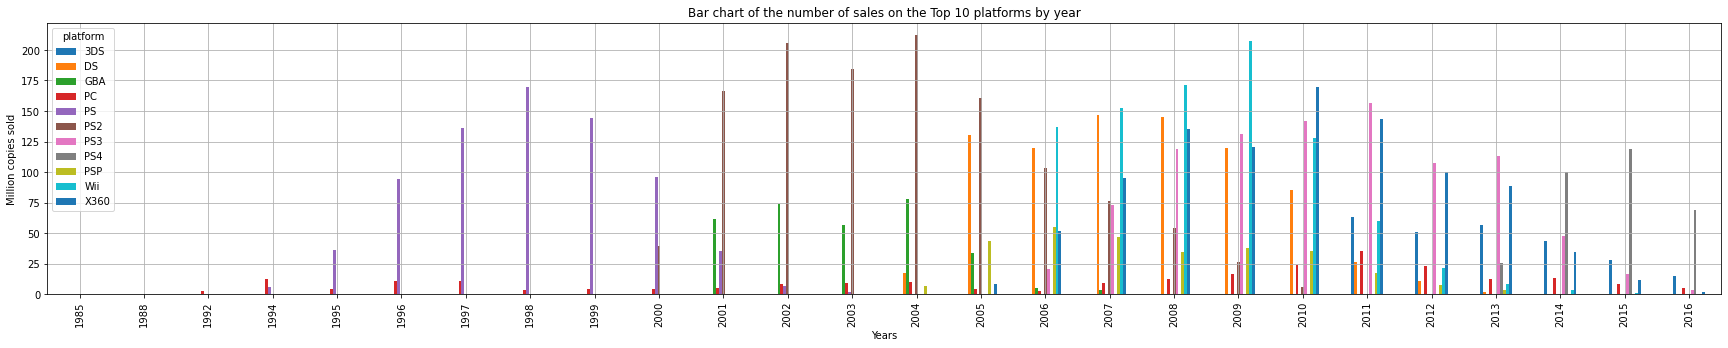

In [10]:
# Build the distribution of sales by years
# for each of the top 10 most successful platforms.
data_top_10_platforms = data.loc[
    data['platform'].isin(top_10_list)
]
top_10_platforms_by_year = data_top_10_platforms.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='sales_total', 
    aggfunc='sum'
)
display(top_10_platforms_by_year)
top_10_platforms_by_year.plot(
    kind='bar', 
    grid=True,
    figsize=(30,5)
)
plt.title('Bar chart of the number of sales' + 
          ' on the Top 10 platforms by year')
plt.xlabel('Years')
plt.ylabel('Million copies sold')
plt.show()

### Intermediate conclusion No. 1

1. We analyzed the number of released games by year. This results in a left-skewed normal distribution. From 1980 to 1992, the number of released games was on average at the same level, and, since 1993, has steadily increased on average until 2008 (the maximum value was 1427 games). After 2008, the number of released games began to decline. It can be assumed that the number of games has fallen due to the development of online multiplayer modes of existing games, and therefore, there is probably no need for regular frequent release of games.  
Data for all periods is important for identifying patterns in the release of new consoles, as well as for calculating the estimated duration of the "commercial life" of the gaming platform.
2. We reviewed the list of the number of games sold by console, and made a ranking of the Top 10 commercially successful platforms. It included (in descending order):
  1. PS2
  2. X360
  3. PS3
  4. Wii
  5. DS
  6. PS
  7. GBA
  8. PS4
  9. PSP
  10. PC
3. We plotted a bar chart of the number of games sold on consoles from our Top 6 ranking and looked at this distribution by year. We discovered:
  * PS games sold from 1994 to 2003 (**10 years**)
  * PS2 games sold from 2000 to 2011 (**12 years**)
  * DS games sold from 2004 to 2013 (**10 years**)
  * X360 games sold from 2005 to 2016 (**12 years**)
  * Wii games sold from 2006 to 2016 (**11 years**)
  * PS3 games sold from 2006 to 2016 (**11 years**)
  * PC games have been on sale for a long time, you can say that they have always been, but significant sales were from 2007 to 2016 (**10 years**)
  * Significant sales of the game on the PSP showed from 2004 to 2013 (**10 years**)
  * PS4 games launched in 2013. As of 2016, this console is the leader in game sales, despite having passed the peak in 2015
  * GBA games sold from 2001 to 2007 (**6 years**).

**Conclusion: It can be assumed that the "commercial lifespan" of a gaming platform is on average 10 years.**
  
  4. Studying the constructed bar chart, you can notice the frequency of release of new gaming platforms.
   * PS2 came out 7 years after PS. Sales on PS stopped 4 years after the release of PS2.
   * PS3, like the Wii, came out 7 years after the PS2. The main competitor of the PS3 X360 came out a year earlier. Sales on the PS2 ended 6 years after the release of the PS3.
   * PS4 came out 8 years after PS3 was released. PS3 sales hit their lowest point in 2016 (4 years after PS4 was released)
   * The handheld console market is slightly different. DS and PSP came out 4 years after GBA. Sales on the GBA ceased 4 years after the release of the DS and PSP.

**Conclusion: it can be assumed that new platform models appear every 7-8 years. There is also reason to believe that it takes 4 years from the release of games on new platforms to the end of sales of games for previous generation platforms.**
Based on the findings, we have to choose the current period, on the basis of which we will plan an advertising campaign for 2017.
**As the current period, we choose the period from 2013 to 2016. the following reasons:**
 1. After a significant drop in game sales between 2009 and 2012. We are seeing a stabilization in the number of game copies sold. An average of 558 million games sold between 2013 and 2016.
 2. In 2013, the flagship models of gaming platforms from leading manufacturers Sony and Microsoft entered the market: PS4 and Xbox One, respectively. This means that it is from 2013 that a new 10-year sales cycle of games for these platforms is supposed to begin. It also means that in 7 years, in 2020, next-generation platforms will presumably be released (*note by the author of the project: by the way, in 2020, the PS5 and Xbox Series X next-generation platforms really came out*)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


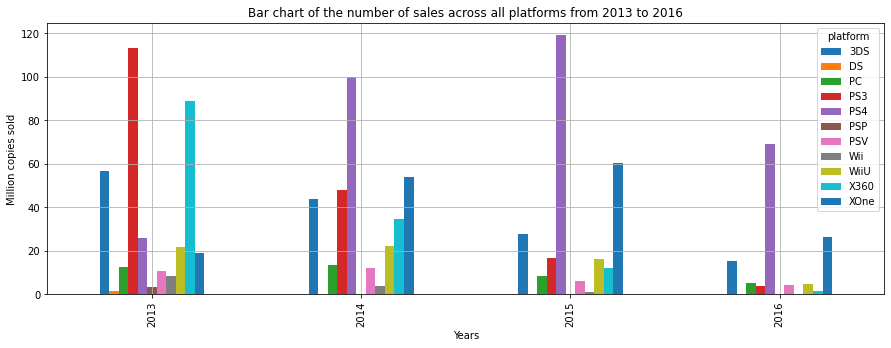

In [11]:
# Take a slice of data from 2013 to 2016.
data_actual = data.loc[
    data['year_of_release'] >= 2013
].reset_index(drop=True)
# There are no more missing values in the year_of_release column.
# Convert its format to int.
data_actual['year_of_release'] = data_actual[
    'year_of_release'
].astype(int)
# Find out which platforms are leading in sales, rising or falling.
data_actual_by_platform = data_actual.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='sales_total', 
    aggfunc='sum'
)
display(data_actual_by_platform)
data_actual_by_platform.plot(
    kind='bar', grid=True,
figsize=(15,5))
plt.title('Bar chart of the number of sales' +
          ' across all platforms from 2013 to 2016')
plt.xlabel('Years')
plt.ylabel('Million copies sold')
plt.show()

### Intermediate conclusion No. 2

We reviewed the sales levels of all platforms between 2013 and 2016. Let's describe the dynamics.
* **3DS**. In 2013, this console ranked 3rd in terms of sales. By 2016, the level of sales was steadily falling, and in 2016 it reached its minimum value. In 2016, the console continues to rank **3rd** in terms of sales.
* **DS**. In 2013, the last sales of games for this console were recorded.
* **PC**. It feels like PC games will be produced in small numbers, but always. In 2013-2014 the level of sales is approximately at the same level and takes 7th place. At the same time, in 2016, the volume of sales of games for PC took, oddly enough, **4th place**.
* **PS3**. The PS3 was the number one selling game in 2013, and gradually dropped to the penultimate place by 2016. Nothing surprising. PS4 entered the market in 2013.
* **PSP**. 2013 is the last year when over a million copies of PSP games were sold. In 2014 and 2015, 240 and 120 thousand copies were sold, and by 2016 sales had ceased.
* **PSV**. In 2013-2014 Games for PSV were marked by relatively low sales. Over the years, they have fallen, and in 2016, PSV is ranked 6th in sales of copies of games.
* **Wii**. Since 2013, sales of Wii games have been steadily declining. In 2016, this platform ranks last in sales of game copies.
* **X360**. In 2013, the Xbox 360 ranked #2 in game sales. Every year sales fell and by 2016 this platform occupies the penultimate place.
* **XOne**. In 2013, the Xbox One entered the market, and until 2015, game sales grew. In 2016, sales fell, although the platform takes **2nd place**.
* **PS4**. In 2013, the PS4 entered the market, and until 2015, sales of games grew. In 2016, sales fell, but the platform confidently takes **1st place**.
  
**Conclusion**: Based on the chart, we will select several potentially profitable platforms. They will be:
* PS4
* XOne
* 3DS
  
  **Based on previously identified patterns, these platforms will be in the top three in terms of game sales in 2017. We propose to focus on them.**

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2215,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
2218,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2219,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sales_total, dtype: float64

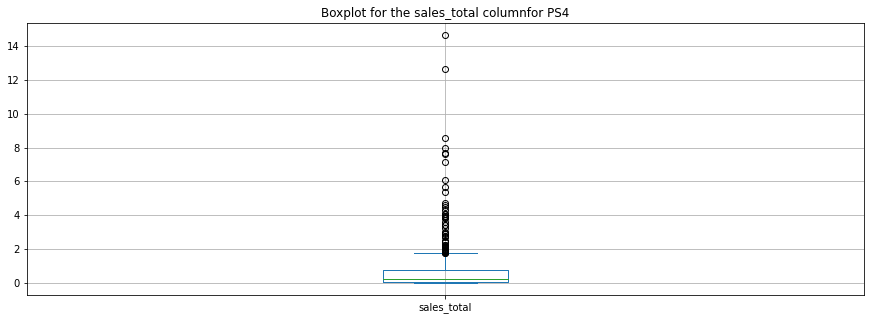

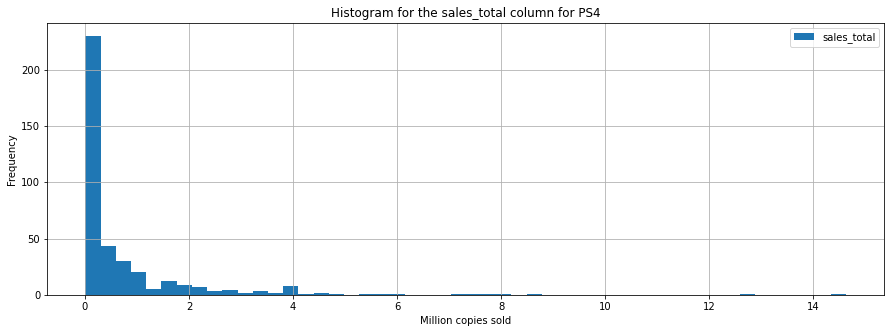

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sales_total, dtype: float64

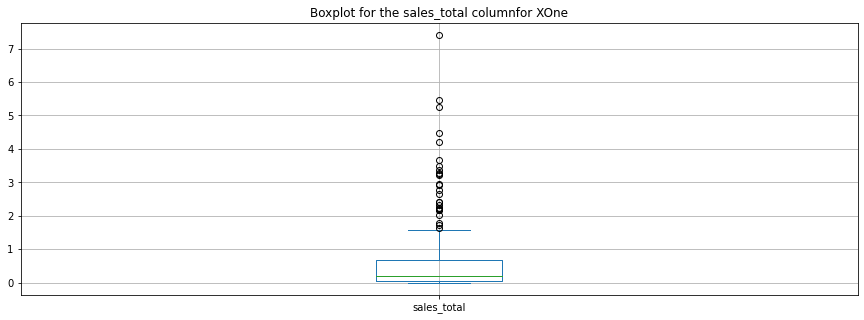

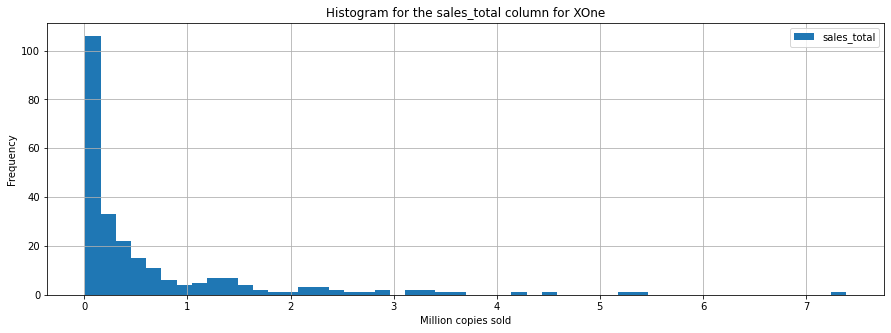

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: sales_total, dtype: float64

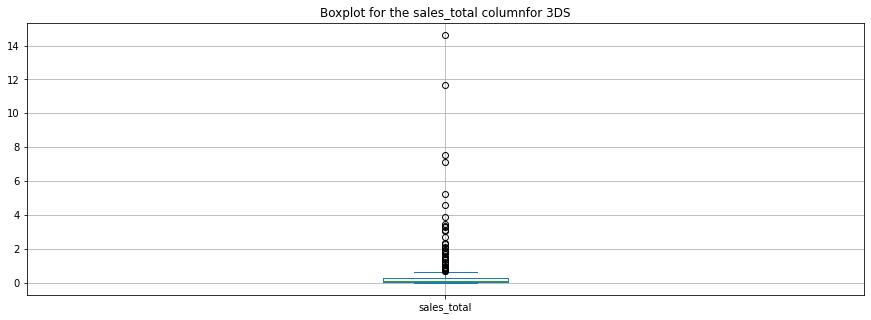

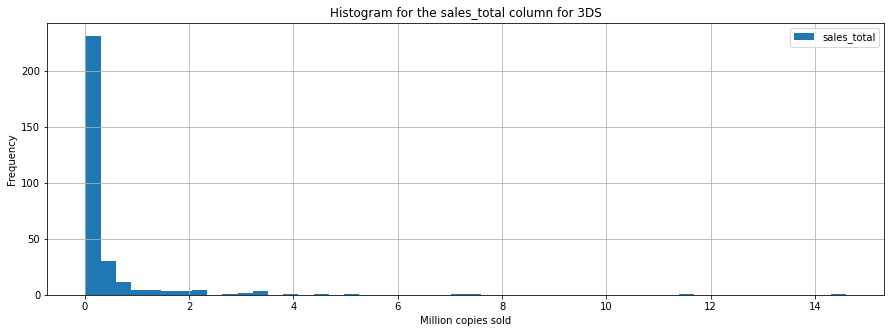

In [12]:
# Build swing charts for global game sales
# broken down by promising platforms.
top3_list = ['PS4', 'XOne', '3DS']
data_actual_top = data_actual.loc[
    data_actual['platform'
               ].isin(top3_list)
]
display(data_actual_top)
for platform in top3_list:
    display(data_actual_top.loc[
        data_actual_top['platform'] == platform, 'sales_total'
    ].describe())
    data_actual_top.loc[
        data_actual_top['platform'] == platform
    ].plot(kind='box',
           y='sales_total',
           grid=True,
           figsize=(15,5))
    plt.title('Boxplot for the sales_total column' + 
              'for ' + str(platform)
             )
    plt.show()
    data_actual_top.loc[
        data_actual_top['platform'] == platform].plot(
        kind='hist',
        bins=50,
        y='sales_total',
        grid=True,
        figsize=(15,5))
    plt.title('Histogram for the sales_total column' + 
              ' for '+ str(platform)
             )
    plt.xlabel('Million copies sold')
    plt.ylabel('Frequency')
    plt.show()


### Intermediate conclusion No. 3
**Study of global sales by platform**
* **PS4**  
On average, PS4 games sold **801,378 copies**. **Median** value was **200,000 copies**. **Minimum** number of game copies sold was **10,000**. **Maximum** &#8212; **14,630,000**. Having reviewed the boxplot, as well as the histogram, it can be noted that there is a Poisson distribution. We will not get rid of the outliers displayed on the swing diagram, since they reflect reality.
* **XOne**  
On average, XBox One sold **645,020 games**. **Median** value was **220,000 copies**. **Minimum** number of game copies sold was **10,000**. **Maximum** &#8212; **7 390 000**. Having reviewed the boxplot, as well as the histogram, it can be noted that there is a Poisson distribution. We will not get rid of the outliers displayed on the swing diagram, since they reflect reality.
* **3DS**  
The 3DS sold an average of **472,772 games**. **Median** value was **90,000 copies**. **Minimum** number of game copies sold was **10,000**. **Maximum** &#8212; **14,600,000**. Having evaluated the boxplot, as well as the histogram, it can be noted that there is a Poisson distribution. We will not get rid of the outliers displayed on the swing diagram, since they reflect reality.

,sales_total,critic_score,user_score
sales_total,1.00000,0.402080,0.014580
critic_score,0.40208,1.000000,0.582984
user_score,0.01458,0.582984,1.000000


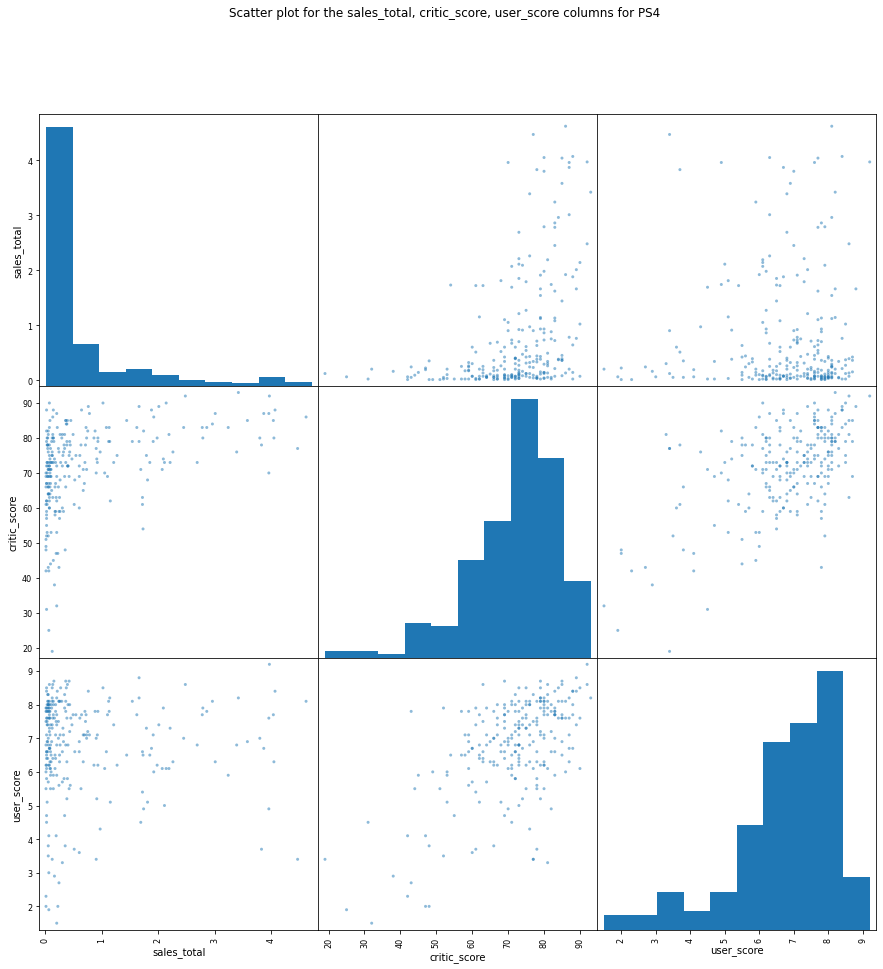

In [13]:
# Let's see how it affects sales within the PS4 platform
# feedback from users and critics.
# Plot a scatterplot and calculate
# correlation between reviews and sales.
# Write the function data_corr.
def data_corr(platform):
    data_actual_wo_outliers =  data_actual_top.loc[
        data_actual_top['sales_total'] <= (data_actual_top[
            'sales_total'].mean() + 3 * data_actual_top[
            'sales_total'].std()
                                          )
    ]
    pltfrm_data = data_actual_wo_outliers.loc[
        data_actual_wo_outliers['platform'] == platform
    ]
    corr_data = pltfrm_data[[
        'sales_total', 
        'critic_score', 
        'user_score'
    ]]
    pd.plotting.scatter_matrix(corr_data, figsize=(15,15))
    plt.suptitle('Scatter plot for the ' +
                 'sales_total, critic_score, user_score columns for ' + 
                 str(platform)
                )
    display(corr_data.corr())

data_corr('PS4')

Now let's correlate the obtained results with sales of games on other platforms.

,sales_total,critic_score,user_score
sales_total,1.000000,0.407140,-0.085555
critic_score,0.407140,1.000000,0.471964
user_score,-0.085555,0.471964,1.000000


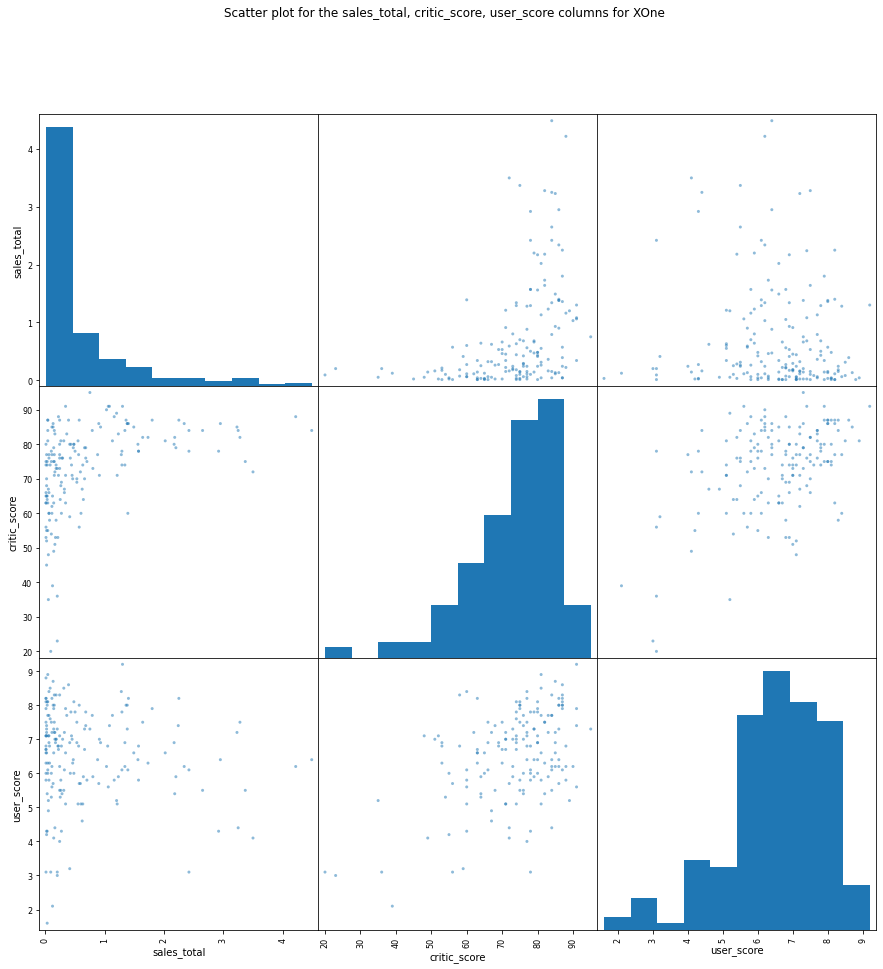

In [14]:
# Plot a scatterplot and calculate the correlation
# between reviews and sales for XOne.
data_corr('XOne')

,sales_total,critic_score,user_score
sales_total,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


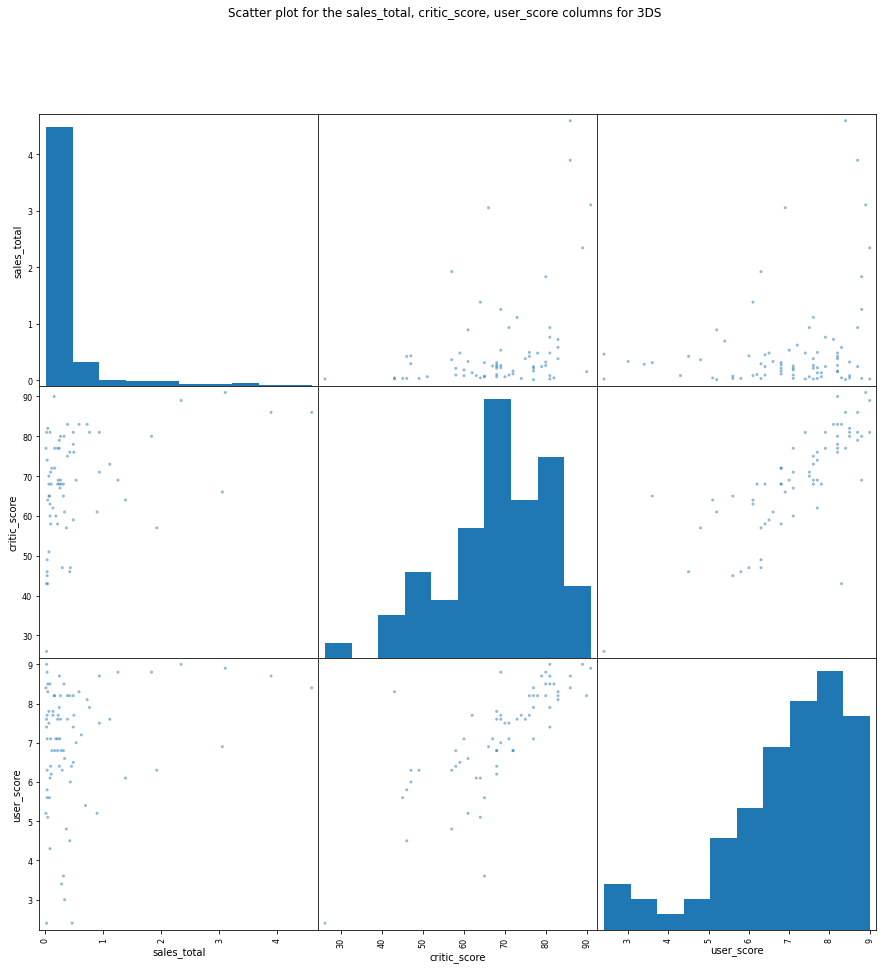

In [15]:
# Plot a scatterplot and calculate the correlation
# between reviews and sales for 3DS.
data_corr('3DS')

### Intermediate conlusion No. 4

**Analysis of the impact of user and critic ratings on sales**
  
**PS4**  
An analysis of the scatter matrix, as well as Pearson's correlation coefficients, showed:
* There is a direct relationship between game sales and critical reviews. However, it is not very strong.
* There is almost no connection between game sales and user ratings.
* This is not the subject of our study. However, it is curious that there is a direct relationship between the ratings of critics and ratings of users. It's not really strong though.
  
**XOne**  
An analysis of the scatter matrix, as well as Pearson's correlation coefficients, showed:
* There is a direct relationship between game sales and critical reviews. However, it is not very strong.
* There is almost no correlation between game sales and user ratings.
* This is not the subject of our study. However, it is curious that there is a direct relationship between the ratings of critics and ratings of users. It's not really strong though.
  
**3DS**  
An analysis of the scatter matrix, as well as Pearson's correlation coefficients, showed:
* There is a direct relationship between game sales and critical reviews. However, it is not very strong.
* There is little direct relationship between game sales and user ratings.

**Conclusion:**
1. We have determined that for PS4 there is a direct relationship between game sales and critical reviews. It is not too strong, but it is, which cannot be said about user ratings. There is almost no relationship between game sales and user ratings.
2. After analyzing the impact of user and critic ratings on the sales of XOne games, we noted the similarity of the results of the analysis with the results of PS4. For XOne, there is a direct relationship between game sales and critical reviews. It is not too strong, but it is, which cannot be said about user ratings. There is almost no relationship between game sales and user ratings.
3. The results of the analysis of the influence of user and critic ratings on the sales of 3DS games surprised us. In addition to a modest direct relationship between sales volume and critic ratings, there is also a slight direct relationship between sales volume and user ratings.

In [16]:
# Consider the distribution of games by genre.
data_actual_top_by_genre = (
    data_actual_top.pivot_table(index='genre', 
                                values='sales_total', 
                                aggfunc=['count','sum'])
)
data_actual_top_by_genre.columns = ['games_number', 'sales_total']
display(
    data_actual_top_by_genre.sort_values(
        'sales_total', ascending=False
    )
)

,games_number,sales_total
genre,,
Action,345,167.45
Shooter,80,148.95
Role-Playing,127,106.91
Sports,92,84.17
Misc,71,22.72
Racing,39,21.93
Fighting,32,19.31
Platform,32,17.41
Adventure,69,12.35


### Intermediate conclusion No. 5

1. An analysis of the distribution of games by genre for the Top 3 platforms showed that most of the games during the current period were released for the **Action** genre (345 games). At the same time, it is this genre that has the largest number of sales of &#8212; 167,450,000 copies.
2. **Shooter, Role-Playing and Sports** ranked second, third and fourth in terms of sales, respectively.
3. The last places, both in terms of the number of games and the number of sales, were taken by the genres **Simulation, Strategy, Puzzle** (11,450,000, 2,310,000, 1,750,000 copies of games, respectively). It should be noted that the number of sales of games of these genres is ten times inferior to the most popular genres.
4. We can only notice that the "champion genres" (**Action**, **Shooter, Role-Playing and Sports**) &#8212; these are genres in which victory over the opponent is ensured through physical superiority, such as better aiming or faster reaction times. Eye-hand coordination also plays a big role. Usually the player is under pressure and doesn't have time for thoughtful planning.
"Genres Outsiders" (**Simulation, Strategy, Puzzle**) &#8212; these are genres of games where you need to apply strategic thinking, play not for a specific character, but for their conditional masses, for example, manage the construction of a city or command entire armies in military campaigns.

### Conclusion

1. We found that the "commercial life span" of a gaming platform is likely to be 10 years on average.
2. We found that new platform models appear every 7-8 years. There is also reason to believe that 4 years pass from the moment games are released on new platforms to the end of sales of games for previous generation platforms.
3. We chose the period from 2013 to 2016 as the relevant period for analysis, since based on this relatively stable period, we can make a forecast for 2017. Also in 2013, PS4 and Xbox One entered the market, making the market more predictable for the next 7 years.
4. We chose three potentially profitable platforms: PS4, XOne, 3DS.
5. We examined the distribution of game sales data from three potentially profitable platforms. It has the character of a Poisson distribution.
6. We determined that for PS4 and XOne, there is a direct relationship between game sales and critical reviews. It is not too strong, but it is, which cannot be said about user ratings. There is almost no relationship between game sales and user ratings. We were surprised by the results of our analysis of the impact of user and critic ratings on 3DS game sales. In addition to a modest direct relationship between sales volume and critic ratings, there is also a slight direct relationship between sales volume and user ratings.
7. We found out that during the current period, most games were released for the **Action**, **Shooter, Role-Playing and Sports** genres. These genres are distinguished by the presence of one hero, as well as the way to ensure victory: physical superiority, eye-hand coordination. The last places, both in terms of the number of games and the number of sales, were taken by the **Simulation, Strategy, Puzzle** genres. These are genres of games where it is necessary to apply strategic thinking, to play not for a specific character, but for their conditional masses, to manage them.

## Drawing up an information portrait of the user of each region

In [17]:
# Define Top 5 popular platforms for three regions:
# North America, Europe, Japan.
top_platforms = data_actual.pivot_table(
    index='platform', 
    values=[
        'na_sales',
        'eu_sales', 
        'jp_sales'
    ], 
    aggfunc='sum'
).reset_index()
display(top_platforms)

,platform,eu_sales,jp_sales,na_sales
0,3DS,30.96,67.81,38.20
1,DS,0.85,0.00,0.57
2,PC,25.36,0.00,11.11
3,PS3,67.81,23.35,63.50
4,PS4,141.09,15.96,108.74
5,PSP,0.17,3.29,0.00
6,PSV,6.10,18.59,5.04
7,Wii,5.93,0.05,6.56
8,WiiU,19.85,10.88,29.21
9,X360,42.52,0.51,81.66


In [18]:
# Write a program to determine the Top 5
# platforms and their share of sales.
def top_platform(region_column):
    top5 = top_platforms[
        ['platform', region_column]
    ].sort_values(
        by=region_column, 
        ascending=False).reset_index(drop=True).loc[:4]
    top5.loc[5, region_column] = top5[region_column].sum()
    top5.rename(index={5: 'total'}, inplace=True)
    top5['share ' + str(region_column)] = (
        top5[region_column] / top5.loc['total', region_column]
    )
    top5['platform'] = top5['platform'].fillna('-')
    display(top5)

In [19]:
# Determine Top 5 platforms and their share of sales. 
# Let's start with North America.
top_platform('na_sales')

,platform,na_sales,share na_sales
0,PS4,108.74,0.282280
1,XOne,93.12,0.241732
2,X360,81.66,0.211983
3,PS3,63.50,0.164841
4,3DS,38.20,0.099164
total,-,385.22,1.000000


In [20]:
# Define the Top 5 platforms in Europe and their share of sales.
top_platform('eu_sales')

,platform,eu_sales,share eu_sales
0,PS4,141.09,0.422463
1,PS3,67.81,0.203042
2,XOne,51.59,0.154475
3,X360,42.52,0.127317
4,3DS,30.96,0.092703
total,-,333.97,1.000000


In [21]:
# Determine the Top 5 platforms in Japan and their share of sales.
top_platform('jp_sales')

,platform,jp_sales,share jp_sales
0,3DS,67.81,0.496449
1,PS3,23.35,0.170950
2,PSV,18.59,0.136101
3,PS4,15.96,0.116846
4,WiiU,10.88,0.079654
total,-,136.59,1.000000


### Intermediate No. 1

**North America**  
Top-5 platforms:
* PS4, 108 740 000 copies. 28,2 %
* XOne, 93 120 000 copies. 24,2 %
* X360, 81 660 000 copies. 21,2 %
* PS3, 63 500 000 copies. 16,5 %
* 3DS, 38 200 000 copies. 9,9 %  
  
**Europe**  
Топ-5 platforms:
* PS4, 141 090 000 copies. 42,2 %
* PS3, 67 810 000 copies. 20,3 %
* XOne, 51 590 000 copies. 15,4 %
* X360, 42 520 000 copies. 12,7 %
* 3DS, 30 960 000 copies. 9,4 %  
  
**Japan**  
Топ-5 platforms:
* 3DS, 67 810 000 copies. 49,6 %
* PS3, 23 350 000 copies. 17,1 %
* PSV, 18 590 000 copies. 13,6 %
* PS4, 15 960 000 copies. 11,7 %
* WiiU, 10 880 000 copies. 8,0 %  
  
**Differences in sales shares**
1. North America is characterized by a fairly even, "calm" distribution of game sales shares by platform. There is no clearly dominant platform. The shares of the first three places were 28.2%, 24.2%, 21.2% (PS4, XOne, X360 respectively). The shares of the fourth and fifth places were 16.5% and 9.9% (PS3, 3DS, respectively).
2. Europe has a leader and it's PS4. With the number of sales of 141,090,000 copies, the share of this platform is 42.2%. Second place belongs to PS3 with a share of 20.3%. Places from third to fifth are relatively evenly distributed: 15.4%, 12.7%, 9.4% (XOne, X360, 3DS, respectively).
3. Japan has a clear, dominant leader. Almost every second game was purchased for the 3DS platform (67,810,000 copies with a 49.6% share). Places from 2 to 5 are relatively evenly distributed: 17.1%, 13.6%, 11.7%, 8% (PS3, PSV, PS4, WiiU, respectively).

In [22]:
# Define Top 5 popular genres for three regions:
# North America, Europe, Japan.
top_genres = data_actual.pivot_table(
    index='genre', 
    values=[
        'na_sales',
        'eu_sales', 
        'jp_sales'
    ], 
    aggfunc='sum'
).reset_index()
display(top_genres)

,genre,eu_sales,jp_sales,na_sales
0,Action,118.13,40.49,126.05
1,Adventure,8.25,5.82,7.14
2,Fighting,8.55,7.65,15.55
3,Misc,20.04,9.20,27.49
4,Platform,15.58,4.79,18.14
5,Puzzle,1.00,1.18,0.83
6,Racing,20.19,2.30,12.96
7,Role-Playing,36.97,51.04,46.40
8,Shooter,87.86,6.61,109.74
9,Simulation,10.92,4.52,4.86


In [23]:
# Write a program to determine the Top 5 genres
# and their share of sales.
def top_genre(region_column):
    top5 = top_genres[
        ['genre', region_column]
    ].sort_values(
        by=region_column, 
        ascending=False).reset_index(drop=True).loc[:4]
    top5.loc[5, region_column] = top5[region_column].sum()
    top5.rename(index={5: 'total'}, inplace=True)
    top5['share ' + str(region_column)] = (
        top5[region_column] / top5.loc['total', region_column]
    )
    top5['genre'] = top5['genre'].fillna('-')
    display(top5)

In [24]:
# Let's calculate the Top 5 genres and their sales shares for North America.
top_genre('na_sales')

,genre,na_sales,share na_sales
0,Action,126.05,0.336178
1,Shooter,109.74,0.292679
2,Sports,65.27,0.174077
3,Role-Playing,46.40,0.123750
4,Misc,27.49,0.073316
total,-,374.95,1.000000


In [25]:
# Let's calculate the Top 5 genres and their share of sales for Europe.
top_genre('eu_sales')

,genre,eu_sales,share eu_sales
0,Action,118.13,0.364970
1,Shooter,87.86,0.271449
2,Sports,60.52,0.186981
3,Role-Playing,36.97,0.114221
4,Racing,20.19,0.062378
total,-,323.67,1.000000


In [26]:
# Let's calculate the Top 5 genres and their sales shares for Japan.
top_genre('jp_sales')

,genre,jp_sales,share jp_sales
0,Role-Playing,51.04,0.443865
1,Action,40.49,0.352118
2,Misc,9.20,0.080007
3,Fighting,7.65,0.066528
4,Shooter,6.61,0.057483
total,-,114.99,1.000000


**North America**
Top 5 genres:
* Action, 126,050,000 copies. 33.6%
* Shooter, 109,740,000 copies. 29.3%
* Sports, 65,270,000 copies. 17.4%
* Role-Playing, 46,400,000 copies. 12.4%
* Misc, 27,490,000 copies. 7.3%
  
**Europe**
Top 5 genres:
* Action, 118,130,000 copies. 36.5%
* Shooter, 87,860,000 copies. 27.1%
* Sports, 60,520,000 copies. 18.7%
* Role-Playing, 36,970,000 copies. 11.4%
* Racing, 20,190,000 copies. 6.3%
  
**Japan**
Top 5 genres:
* Role-Playing, 51,040,000 copies. 44.4%
* Action, 40,490,000 copies. 35.2%
* Misc, 9,200,000 copies. eight %
* Fighting, 7,650,000 copies. 6.7%
* Shooter, 6,610,000 copies. 5.7%
  
**Differences in sales shares**
1. In North America and Europe, the shares are quite similar + the first four places in the ranking are the same.
1st place Action (33.6% North America, 36.5% Europe), 2nd place Shooter (29.3% North America, 27.1% Europe),
3rd place Sports (17.4% North America, 18.7% Europe), 4th place Role-Playing (12.4% North America, 11.4% Europe).
5th place in North America is occupied by Misc (7.3%). And in Europe Racing (6.3%).
2. Japan again has a clear, dominant leader. The role-playing genre ranks first with a 44.4% share of sales. Second place goes to Action with 35.2%. The remaining three genres received less than 10%: Misc (8%), Fighting (6.7%), Shooter (5.7%).

In [27]:
# Let's see if the ESRB rating affects sales in a particular region.
# Let's work with this table.
# Replace NaN-values with marker X to analyze
# distribution of sales with a missing rating by region.
data_actual_copy = data_actual.copy()
data_actual_copy['rating'] = data_actual_copy['rating'].fillna('X')
data_rating = data_actual_copy.pivot_table(
    index='rating', 
    values=[
        'na_sales',
        'eu_sales', 
        'jp_sales'
    ], 
    aggfunc='sum'
).reset_index()
display(data_rating)

,rating,eu_sales,jp_sales,na_sales
0,E,83.36,15.14,79.05
1,E10+,42.69,5.89,54.24
2,M,145.32,14.11,165.21
3,T,41.95,20.59,49.79
4,X,78.91,85.05,89.42


In [28]:
# Create a function to determine the shares
# of sales depending on the rating.
def rating(region_column):
    rating_d = data_rating[[
        'rating', region_column
    ]].reset_index(drop=True)
    rating_d.loc[5, region_column] = rating_d[region_column].sum()
    rating_d.rename(index={5: 'total'}, inplace=True)
    rating_d['share ' + str(region_column)] = (
        rating_d[region_column] / rating_d.loc['total', region_column]
    )
    rating_d['rating'] = rating_d['rating'].fillna('-')
    display(rating_d)

In [29]:
# Let's calculate the share of sales depending on the rating in North America.
rating('na_sales')

,rating,na_sales,share na_sales
0,E,79.05,0.180599
1,E10+,54.24,0.123918
2,M,165.21,0.377442
3,T,49.79,0.113751
4,X,89.42,0.204291
total,-,437.71,1.000000


In [30]:
# Calculate the share of sales depending on the rating in Europe.
rating('eu_sales')

,rating,eu_sales,share eu_sales
0,E,83.36,0.212528
1,E10+,42.69,0.108839
2,M,145.32,0.370497
3,T,41.95,0.106953
4,X,78.91,0.201183
total,-,392.23,1.000000


In [31]:
# Calculate the share of sales depending on the rating in Japan.
rating('jp_sales')

,rating,jp_sales,share jp_sales
0,E,15.14,0.107544
1,E10+,5.89,0.041838
2,M,14.11,0.100227
3,T,20.59,0.146257
4,X,85.05,0.604134
total,-,140.78,1.000000


### Intermediate conclusion No. 2

We calculated the share of game sales depending on their ESRB rating.
For E and E10+ ratings, the calculation results in North America and Europe do not differ much from each other. But in Japan, the figures are about 2 times lower:
* North America 18%, 12.4% respectively
* Europe 21.3%, 10.0% respectively
* Japan 10.8%, 4.1% respectively
  
Our attention was drawn to the M and T ratings. If North America and Europe share these ratings about the same (37.7%, 11.3% for America and 37% and 10.7% for Europe), then Japan has a share of the M rating 10%, while the T rating has 14.6%.
**Probably in Japan, an M (Adults Only) rating discourages the user from purchasing the game, while a T (Teen) rating is actually attractive.**
  
It is also extremely interesting to look at the distribution of the share of sales with a missing value in the ESRB rating, which we marked with an X marker.
In North America and Europe, the same proportion of sales with a missing &#8212; 20 %. In Japan, the share of sales with a missing rating is as much as 60%.
**ESRB rating is required for retail sales in the US and Canada. It is not possible to buy a game box without a rating assigned to it in the US and Canada. The absence of rating data in the dataset indicates that the compiler simply did not have this data at the time the dataset was created.
How can you explain the 60% share of sales of skipped games in Japan? Perhaps this share can be explained by the fact that ESRB &#8212; this is an organization that operates only in the United States and Canada. Japan has its own organization that evaluates the CERO age rating. Maybe the high sales of ESRB-missing games in Japan are due to that. that these games have a CERO rating, and it's not as hard-rated as the ESRB or PEGI, allowing more young Japanese to buy games.**

### Conclusion

**Top 5 platforms**
1. North America is characterized by a fairly even, "calm" distribution of game sales shares by platform. There is no clearly dominant platform. The shares of the first three places were 28.2%, 24.2%, 21.2% (PS4, XOne, X360 respectively). The shares of the fourth and fifth places were 16.5% and 9.9% (PS3, 3DS, respectively).
2. PS4 is the leader in Europe. With the number of sales of 141,090,000 copies, the share of this platform is 42.2%. Second place belongs to PS3 with a share of 20.3%. Places from third to fifth are relatively evenly distributed: 15.4%, 12.7%, 9.4% (XOne, X360, 3DS, respectively).
3. Japan has a clear, dominant leader. Almost every second game was purchased for the 3DS platform (67,810,000 copies with a 49.6% share). Places from 2 to 5 are relatively evenly distributed: 17.1%, 13.6%, 11.7%, 8% (PS3, PSV, PS4, WiiU, respectively).
**Top 5 genres**
1. In North America and Europe, the shares are quite similar + the first four places in the ranking are the same.
* 1st place Action (33.6% North America, 36.5% Europe)
* 2nd Place Shooter (29.3% North America, 27.1% Europe)
* 3rd Sports (17.4% North America, 18.7% Europe)
* 4th place Role-Playing (12.4% North America, 11.4% Europe)
* 5th place in North America is occupied by Misc (7.3%). And in Europe Racing (6.3%)
2. Japan again has a clear, dominant leader. The role-playing genre ranks first with a 44.4% share of sales. Second place goes to Action with 35.2%. The remaining three genres received less than 10%: Misc (8%), Fighting (6.7%), Shooter (5.7%).
**Impact of ESRB ratings on sales**
For ratings E and E10+, the calculation results in all three regions do not differ much from each other:
* North America 22.7%, 15.6% respectively
* Europe 26.6%, 13.6% respectively
* Japan 27.2%, 10.6% respectively

Our attention was drawn to the M and T ratings. If North America and Europe share these ratings are approximately the same (47.4%, 14.3% for America and 46.4% and 13.4% for Europe), then Japan has a share of the rating M is 25.3% and T is 36.9%.
**Probably in Japan, an M (Adults Only) rating discourages the user from purchasing the game, while a T (Teen) rating is actually attractive.**
  

## Hypothesis testing

Let's test the hypothesis "The average user ratings of the Xbox One and PC platforms are the same".
We have two populations: Xbox One and PC platform user ratings.

In [32]:
# Prepare data arrays.
# Xbox One first. Slice the data and calculate the average.
data_xbox = data_actual.loc[
    data_actual['platform'] == 'XOne', 'user_score'
]
data_xbox_mean = data_xbox.mean()
# Now PC. Let's slice the data and calculate the average.
data_pc = data_actual.loc[
    data_actual['platform'] == 'PC', 'user_score'
]
data_pc_mean = data_pc.mean()
print('Average user rating' +
      ' for this sample for Xbox One :', data_xbox_mean)
print('Average user rating' + 
      ' for this sample for PC:', data_pc_mean)

Average user rating for this sample for Xbox One : 6.52142857142857
Average user rating for this sample for PC: 6.269677419354836


Let's formulate a null hypothesis: the average user ratings of the Xbox One and PC platforms do not differ.
Let's formulate an alternative hypothesis: the average user ratings of the Xbox One and PC platforms are different.

In [33]:
# Set the significance level.
alpha = .05
results = st.ttest_ind(
    data_xbox, data_pc, equal_var=False, nan_policy='omit'
)
print()
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')


p-value: 0.1475959401343003
Failed to reject the null hypothesis


Let's test the hypothesis "Average user ratings for the Action and Sports genres are different."
We have two populations: User Ratings for the Action and Sports genres.

In [34]:
# Prepare data arrays.
# Action first. Let's slice the data and calculate the average.
data_action = data_actual.loc[
    data_actual['genre'] == 'Action', 'user_score'
]
data_action_mean = data_action.mean()
# Now Sports. Let's slice the data and calculate the average.
data_sports = data_actual.loc[
    data_actual['genre'] == 'Sports', 'user_score'
]
data_sports_mean = data_sports.mean()
print('Average user rating' + 
      ' for this sample for Action genre :', data_action_mean)
print('Average user rating' + 
      ' for this sample for Sports genre:', data_sports_mean)

Average user rating for this sample for Action genre : 6.837532133676097
Average user rating for this sample for Sports genre: 5.238124999999999


Let's formulate the null hypothesis: The average user ratings of the Action and Sports genres do not differ.  
Let's formulate an alternative hypothesis: The average user ratings of the Action and Sports genres are different.

In [35]:
# Set the significance level.
alpha = .05
results = st.ttest_ind(
    data_action, data_sports, equal_var=False, nan_policy='omit'
)
print()
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')


p-value: 1.446003970070351e-20
Reject the null hypothesis


### Conclusion

Our task was to test two hypotheses:
* Average user ratings for Xbox One and PC platforms are the same
* Average user ratings for Action and Sports are different

We have determined that both hypotheses are two-tailed hypotheses about the equality of the means of the two populations.
For each case, we determined the null and alternative hypotheses, and after that we performed a calculation in which we compared the p-value level with a 5% significance level.
  
**<u>Average user ratings for Xbox One and PC platforms are the same</u>**  
**$H_0$:** Average user ratings for Xbox One and PC platforms are the same.  
**$H_1$:** Average user ratings for Xbox One and PC platforms vary.
  
**<u>Average user ratings for Action and Sports are different</u>**  
**$H_0$:** The average user ratings for the Action and Sports genres do not differ.  
**$H_1$:** Average user ratings for the Action and Sports genres differ.

  
**Calculation results**
* We were unable to reject the null hypothesis "the average user ratings of the Xbox One and PC platforms do not differ" because the <br> P-value was above the 5% significance level. **<u>Apparently, despite the difference in average values, in almost 15% of cases such a difference will happen by chance. We do not rule out that the average user ratings of the Xbox One and PC platforms do not really differ.</u>**
* The null hypothesis "the average user ratings of the Action and Sports genres do not differ" was rejected by us, since the P-value level turned out to be significantly lower than the 5% significance level. **<u>Apparently, the average user ratings of the Action and Sports genres do differ.</u>**

## General conclusion

Our task was to identify patterns that determine the success of the game. This will allow our online store to put our stake on a potentially popular product and plan advertising campaigns.
What did we do?
1. We studied the input dataset, processed it, getting rid of unnecessary data and changing the data type in the required column. We also changed the case of the table column names, which greatly facilitated our further work. In addition, we calculated the global ones for games, thereby enriching the input dataset.
2. In the course of the exploratory analysis, we have identified interesting patterns:
 * It is likely that the "commercial life span" of a gaming platform is 10 years on average.
 * New platform models appear every 7-8 years. There is also reason to believe that 4 years pass from the moment games are released on new platforms to the end of sales of games for previous generation platforms.
3. We chose the period from 2013 to 2016 as the relevant period for analysis. This is a relatively stable period. Based on it, you can make a forecast for 2017. Also in 2013, PS4 and Xbox One entered the market, making the market more predictable for the next 7 years.
4. We have chosen three potentially profitable platforms: PS4, XOne, 3DS.
5. We have determined that for PS4 and XOne, there is a direct relationship between game sales and critical reviews. There is almost no connection between game sales and user ratings. Based on the results of the analysis of the 3DS platform, it can be noted that in addition to a moderate direct relationship between sales volumes and critics' ratings, there is also a slight direct relationship between sales volumes and user ratings.
6. We found out that most of the games during the current period were released for the Action, Shooter, Role-Playing and Sports genres. The last places, both in terms of the number of games and the number of sales, were occupied by the Simulation, Strategy, and Puzzle genres.
7. We ranked the Top 5 Platforms and Top 5 Genres by Sales Volume for three global markets: North America, Europe and Japan. We calculated the shares of each platform and each genre from the total number of ratings, finding out the preferences of the three regions.
8. We found that in North America and Europe, the ESRB rating affects user preferences in a similar way. Most prefer M-rated games (adults only). In Japan, the M rating is likely to repel the user from buying the game, while the T rating (for teenagers) is the opposite.
9. We considered two hypotheses. We do not exclude the possibility that the average user ratings of the Xbox One and PC platforms do not really differ. Apparently, the average user ratings of the Action and Sports genres do differ.
  
Based on the findings, we can recommend to our online store:
* Focus in 2017 on PS4, XOne, 3DS platforms.
* When purchasing games for PS4, XOne, it is recommended to rely on critics' ratings, and when purchasing games for 3DS, it is recommended to rely on user ratings in addition to critics' ratings.
* When selling games, be guided by the compiled ratings for platforms, genres, depending on the region. Consider the impact of the ESRB rating.
* Please note that the average user ratings of the Xbox One and PC platforms may not differ, and the average user ratings of the Action and Sports genres do differ. 